In [2]:
!pip install folium

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium

In [4]:
df = pd.read_csv("C:\\Users\\shemw\\Downloads\\Crimes_-_2001_to_Present.csv")
print(df)

C:\Users\shemw\AppData\Local\Temp\ipykernel_25608\2174314682.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\shemw\\Downloads\\Crimes_-_2001_to_Present.csv")


              ID Case Number              Date                    Block  IUCR  \
0       12014684    JD189901   3/17/2020 21:30     039XX N LECLAIRE AVE   820   
1       11864018    JC476123    9/24/2019 8:00     022XX S MICHIGAN AVE  1154   
2       11859805    JC471592  10/13/2019 20:30      024XX W CHICAGO AVE   860   
3       12571973    JE482457   12/19/2021 7:23        042XX S MOZART ST   460   
4       12012127    JD189186    3/18/2020 2:03     039XX W JACKSON BLVD   910   
...          ...         ...               ...                      ...   ...   
842335  12814830    JF381315    8/14/2022 0:00         040XX N BROADWAY  1206   
842336  12815209    JF381666    9/3/2022 13:18  013XX S SPRINGFIELD AVE   420   
842337  12815281    JF381762    9/3/2022 14:45   116XX S MARSHFIELD AVE   918   
842338  12819666    JF386901     9/1/2022 0:00      079XX S CRANDON AVE  031A   
842339  12815081    JF380892    9/2/2022 21:49      062XX S NEWLAND AVE   486   

               Primary Type

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842340 entries, 0 to 842339
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    842340 non-null  int64  
 1   Case Number           842340 non-null  object 
 2   Date                  842340 non-null  object 
 3   Block                 842340 non-null  object 
 4   IUCR                  842340 non-null  object 
 5   Primary Type          842340 non-null  object 
 6   Description           842340 non-null  object 
 7   Location Description  838550 non-null  object 
 8   Arrest                842340 non-null  bool   
 9   Domestic              842340 non-null  bool   
 10  Beat                  842340 non-null  int64  
 11  District              842340 non-null  int64  
 12  Ward                  842296 non-null  float64
 13  Community Area        842339 non-null  float64
 14  FBI Code              842340 non-null  object 
 15  

In [6]:
#Resetting the index 
index_names = df[df['Latitude']=='(41.789832136, -87.672973835)'].index
df.drop(index_names, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842340 entries, 0 to 842339
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    842340 non-null  int64  
 1   Case Number           842340 non-null  object 
 2   Date                  842340 non-null  object 
 3   Block                 842340 non-null  object 
 4   IUCR                  842340 non-null  object 
 5   Primary Type          842340 non-null  object 
 6   Description           842340 non-null  object 
 7   Location Description  838550 non-null  object 
 8   Arrest                842340 non-null  bool   
 9   Domestic              842340 non-null  bool   
 10  Beat                  842340 non-null  int64  
 11  District              842340 non-null  int64  
 12  Ward                  842296 non-null  float64
 13  Community Area        842339 non-null  float64
 14  FBI Code              842340 non-null  object 
 15  

In [8]:
#Changing Latitudes data type to a float
df['Latitude'] = df['Latitude'].astype('float64')

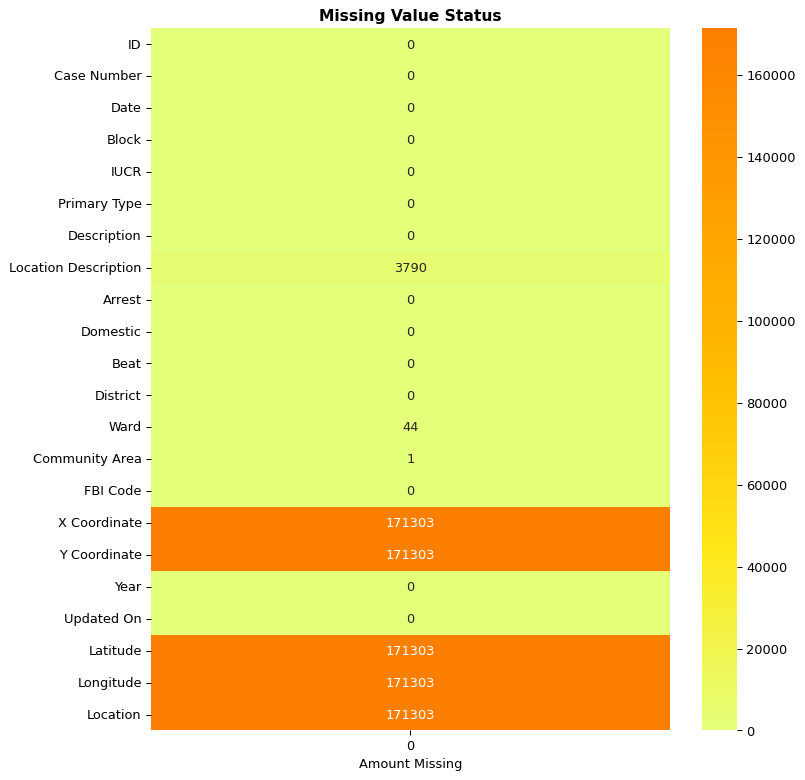

In [9]:
#Plot missing values
plt.figure(figsize=(9,10), dpi=93)
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='Wistia')
ax.set_xlabel('Amount Missing')
plt.show()


In [10]:
#Finding null values #Yellow spaces indicate null values
plt.figure(figsize=(9,10))
sns.heatmap(df.isnull(), cbar = false, cmap = 'inferno')
plt.show()

NameError: name 'false' is not defined

<Figure size 648x720 with 0 Axes>

In [ ]:
#Amount of location descriptions Per category
pd.value_counts(df['Location Description'])[:10]

In [ ]:
#Type of Crimes Per Category 
pd.value_counts(df['Primary Type'])[:10]

In [ ]:
crime_count = pd.DataFrame(df.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())

In [ ]:
crime_count2 = pd.DataFrame(df.groupby('Location Description').size().sort_values(ascending=False).rename('counts').reset_index())

In [ ]:
#Plotting Primary types and Location Description into Bar Graphs

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("dark")
sns.barplot(x="counts", y="Primary Type", data=crime_count.iloc[:10, :],
            label="Total", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type of crime",
       xlabel="Crimes")
sns.despine(left=True, bottom=True)

plt.show()


In [ ]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("dark")
sns.barplot(x="counts", y="Location Description", data=crime_count2.iloc[:10, :],
            label="Total", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type of crime",
       xlabel="Crimes")
sns.despine(left=True, bottom=True)

plt.show()

In [ ]:
import numpy as np 
import pandas as pd
import os

In [ ]:
list = os.listdir()
  
print(list)

In [14]:
import os
from pathlib import Path

df2 = os.path.join(os.getcwd(), "Crimes_-_2001_to_Present.csv")

In [15]:
df = pd.read_csv('Crimes_-_2001_to_Present.csv')
df.head()

C:\Users\shemw\AppData\Local\Temp\ipykernel_25608\3909870916.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Crimes_-_2001_to_Present.csv')


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12014684,JD189901,3/17/2020 21:30,039XX N LECLAIRE AVE,820,THEFT,$500 AND UNDER,STREET,False,False,...,45.0,15.0,6,1141659.0,1925649.0,2020,3/25/2020 15:45,41.952052,-87.754660,"(41.952051946, -87.754660372)"
1,11864018,JC476123,9/24/2019 8:00,022XX S MICHIGAN AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COMMERCIAL / BUSINESS OFFICE,False,False,...,3.0,33.0,11,1177560.0,1889548.0,2019,10/20/2019 15:56,41.852248,-87.623786,"(41.852248185, -87.623786256)"
2,11859805,JC471592,10/13/2019 20:30,024XX W CHICAGO AVE,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,False,False,...,26.0,24.0,6,1160005.0,1905256.0,2019,10/20/2019 16:03,41.895732,-87.687784,"(41.895732399, -87.687784384)"
3,12571973,JE482457,12/19/2021 7:23,042XX S MOZART ST,460,BATTERY,SIMPLE,SIDEWALK,True,True,...,15.0,58.0,08B,1158067.0,1876425.0,2021,9/12/2022 16:45,41.816657,-87.695689,"(41.81665685, -87.695688608)"
4,12012127,JD189186,3/18/2020 2:03,039XX W JACKSON BLVD,910,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,False,True,...,28.0,26.0,7,1150196.0,1898398.0,2020,3/25/2020 15:47,41.877110,-87.723990,"(41.877110187, -87.723989719)"


In [16]:
import folium
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#Creating the map using folium
chicago_crime_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=10.5,
                        tiles="CartoDB positron")

In [18]:
#Using groupby function to group the data by community area 
locations = df.groupby('Community Area').first()

In [19]:
locations2 = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Primary Type']]

In [20]:
#Checking the first 5 columns of the set list
locations2.head()

,Latitude,Longitude,Location Description,Primary Type
Community Area,,,,
1.0,42.002590,-87.673409,RESIDENCE PORCH/HALLWAY,THEFT
2.0,42.007772,-87.688077,APARTMENT,BATTERY
3.0,41.975838,-87.659854,GAS STATION,ASSAULT
4.0,41.961278,-87.694157,VEHICLE NON-COMMERCIAL,THEFT
5.0,41.943122,-87.686292,RESIDENCE PORCH/HALLWAY,THEFT


In [21]:
#Needed with-in the map for descriptions when clicking on specifc areas
popup_text = """Community Index : {}<br
                Primary Type : {}<br>
                Location Description : {}<br>"""

In [22]:
for i in range(len(locations2)):
    lat = locations2.iloc[i][0]
    long = locations2.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Primary Type : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(locations2.index[i],
                               locations2.iloc[i][-1],
                               locations2.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_crime_map)

In [23]:
chicago_crime_map

In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [25]:
df3 = pd.read_csv('Crimes_-_2001_to_Present.csv')

C:\Users\shemw\AppData\Local\Temp\ipykernel_25608\2550302787.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('Crimes_-_2001_to_Present.csv')


In [26]:
print('Dataset Shape before drop_duplicate : ', df3.shape)
df3.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
print('Dataset Shape after drop_duplicate: ', df3.shape)

Dataset Shape before drop_duplicate :  (842340, 22)
Dataset Shape after drop_duplicate:  (842340, 22)


In [27]:
df3.Date = pd.to_datetime(df3.Date, format='%m/%d/%Y %H:%M')

In [28]:
df3.index = pd.DatetimeIndex(df3.Date)


In [29]:
del list

NameError: name 'list' is not defined

In [30]:
loc_to_change = list(df3['Location Description'].value_counts()[20:].index)
desc_to_change = list(df3['Description'].value_counts()[20:].index)

In [31]:
df3.loc[df3['Location Description'].isin(loc_to_change) , df3.columns=='Location Description'] = 'OTHER'
df3.loc[df3['Description'].isin(desc_to_change) , df3.columns=='Description'] = 'OTHER'

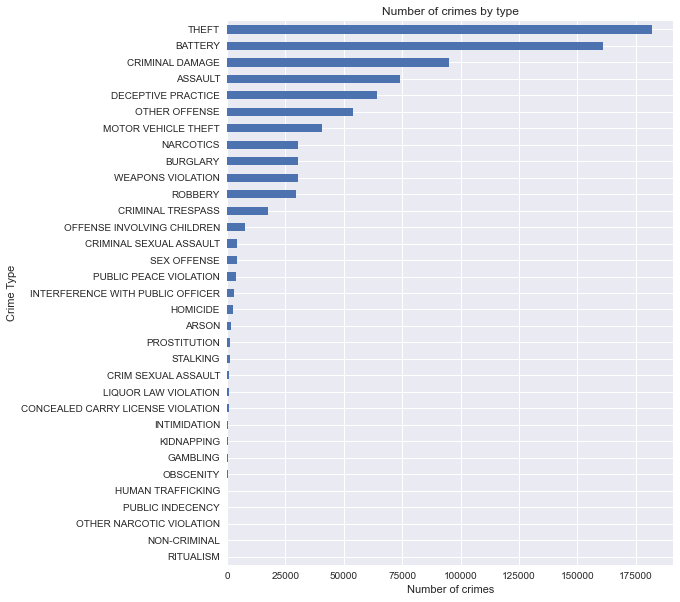

In [32]:
plt.figure(figsize=(8,10))
df3.groupby([df3['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

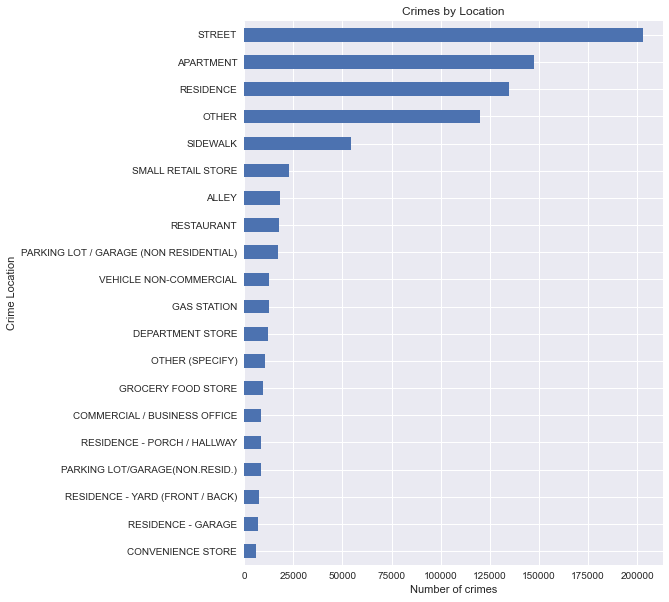

In [33]:
plt.figure(figsize=(7.5,10))
df3.groupby([df3['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()